In [1]:
from tkinter import *
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

C:\Users\Harshitha Gowda\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
tr_df=pd.read_csv("Training.csv")

In [6]:
tr_df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:
#convert categorical values to continues
tr_df["prognosis"] = tr_df["prognosis"].replace(['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
'Peptic ulcer diseae','AIDS','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ',
'Migraine','Cervical spondylosis',
'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
'Heart attack','Varicose veins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
'Impetigo'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])
tr_df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,37
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,39
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,40


In [8]:
true_disease=tr_df["prognosis"]

In [9]:
print(true_disease)


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
4890    11
4891    12
4892    13
4893    14
4894    15
4895    16
4896    17
4897    18
4898    19
4899    20
4900    21
4901    22
4902    23
4903    24
4904    25
4905    26
4906    27
4907    28
4908    29
4909    30
4910    31
4911    32
4912    33
4913    34
4914    35
4915    36
4916    37
4917    38
4918    39
4919    40
Name: prognosis, Length: 4920, dtype: int64


In [10]:
tr_X=tr_df.iloc[:,:-1]
tr_y=tr_df.iloc[:,-1:]
tr_Xtrain,tr_Xtest,tr_ytrain,tr_ytest = train_test_split(tr_X,tr_y,test_size = 0.2,random_state = 0)

In [11]:
print(len(tr_ytrain))

3936


In [12]:
tr_Xtrain.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
613,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4155,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3321,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tr_ytrain.tail(5)

,prognosis
4859,21
3264,25
1653,1
2607,24
2732,26


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(tr_Xtrain,tr_ytrain)

C:\Users\Harshitha Gowda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Harshitha Gowda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
tr_pred = rf.predict(tr_Xtest)

In [16]:
print(tr_pred)
print("Random forest accuracy for tr : {}".format(rf.score(tr_Xtest , tr_ytest)))

[29 19 25 33  5 10 34 30 19 18 38 40  2 30  0 13 10  6 31 31  6 22  4  4
 27 26 38 28 14  1  3  4 28 22 16  7  9  4 37  4 36 23  5 14 29 38 22 29
 28 30 32 38  5 20 18 16 28 23 13 29 12 11 39 14 10 40  1 21 28 16 24 13
 14 13 31 25  8 29  8 14 39 23 37  3 34  7 14  7  7 27 22 17 15  0 26 20
 30  0 15 35 18 40 11 31  4 11 31 16 10 28  4 25 14 37 34 17 23 29 27  9
  0 33 23 18 14 39 27  0  5 17 34  2 40 38 26 15 37 38 15 13 19 11  9  9
 10 18 17 16 20  4  8  2 36 15  7  2 36 15  4  8  5 14 32  6  4  9 12  2
 19 25 20 40 31 19 39 19  6 23  0 17 11 30 38 13  3 16  9  0 24 18 12  9
  5 32 37 15 19 38 20  2  6 37 35  0 30 14 15 12 11 22 28 15  2 16 17 14
 36 13  6 30 30 13 12 14  6  8 19  0 12  5 27 32 30 30 32 30  8 40 13 37
 21  7 13 26 18 35  9 32 14 16 40 34 24 16 26  7 11  7  4 40  4 23 36 37
  1 20  5 26 18 34  8 22 13 18 24 32 14 36  2 33  2 23 39 35 14 37 39 36
 13  9 27  9 14 39 24 28 28 23 23 25 32  7 26 16  4 40  6 12 16 29  1 26
 30 28 11 12 19 11 37  9 15  9 26 26 14  3 26 21 37

In [17]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()   # empty model of the decision tree
dt.fit(tr_Xtrain,tr_ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
tr_pred = dt.predict(tr_Xtest)

In [19]:
print(tr_pred)
print("decision tree accuracy for tr : {}".format(dt.score(tr_Xtest , tr_ytest)))

[29 19 25 33  5 10 34 30 19 18 38 40  2 30  0 13 10  6 31 31  6 22  4  4
 27 26 38 28 14  1  3  4 28 22 16  7  9  4 37  4 36 23  5 14 29 38 22 29
 28 30 32 38  5 20 18 16 28 23 13 29 12 11 39 14 10 40  1 21 28 16 24 13
 14 13 31 25  8 29  8 14 39 23 37  3 34  7 14  7  7 27 22 17 15  0 26 20
 30  0 15 35 18 40 11 31  4 11 31 16 10 28  4 25 14 37 34 17 23 29 27  9
  0 33 23 18 14 39 27  0  5 17 34  2 40 38 26 15 37 38 15 13 19 11  9  9
 10 18 17 16 20  4  8  2 36 15  7  2 36 15  4  8  5 14 32  6  4  9 12  2
 19 25 20 40 31 19 39 19  6 23  0 17 11 30 38 13  3 16  9  0 24 18 12  9
  5 32 37 15 19 38 20  2  6 37 35  0 30 14 15 12 11 22 28 15  2 16 17 14
 36 13  6 30 30 13 12 14  6  8 19  0 12  5 27 32 30 30 32 30  8 40 13 37
 21  7 13 26 18 35  9 32 14 16 40 34 24 16 26  7 11  7  4 40  4 23 36 37
  1 20  5 26 18 34  8 22 13 18 24 32 14 36  2 33  2 23 39 35 14 37 39 36
 13  9 27  9 14 39 24 28 28 23 23 25 32  7 26 16  4 40  6 12 16 29  1 26
 30 28 11 12 19 11 37  9 15  9 26 26 14  3 26 21 37

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model = nb.fit(tr_Xtrain,np.ravel(tr_ytrain))

In [21]:
tr_pred = model.predict(tr_Xtest)

In [22]:
print(tr_pred)
print("naive bais accuracy for tr : {}".format(nb.score(tr_Xtest , tr_ytest)))

[29 19 25 33  5 10 34 30 19 18 38 40  2 30  0 13 10  6 31 31  6 22  4  4
 27 26 38 28 14  1  3  4 28 22 16  7  9  4 37  4 36 23  5 14 29 38 22 29
 28 30 32 38  5 20 18 16 28 23 13 29 12 11 39 14 10 40  1 21 28 16 24 13
 14 13 31 25  8 29  8 14 39 23 37  3 34  7 14  7  7 27 22 17 15  0 26 20
 30  0 15 35 18 40 11 31  4 11 31 16 10 28  4 25 14 37 34 17 23 29 27  9
  0 33 23 18 14 39 27  0  5 17 34  2 40 38 26 15 37 38 15 13 19 11  9  9
 10 18 17 16 20  4  8  2 36 15  7  2 36 15  4  8  5 14 32  6  4  9 12  2
 19 25 20 40 31 19 39 19  6 23  0 17 11 30 38 13  3 16  9  0 24 18 12  9
  5 32 37 15 19 38 20  2  6 37 35  0 30 14 15 12 11 22 28 15  2 16 17 14
 36 13  6 30 30 13 12 14  6  8 19  0 12  5 27 32 30 30 32 30  8 40 13 37
 21  7 13 26 18 35  9 32 14 16 40 34 24 16 26  7 11  7  4 40  4 23 36 37
  1 20  5 26 18 34  8 22 13 18 24 32 14 36  2 33  2 23 39 35 14 37 39 36
 13  9 27  9 14 39 24 28 28 23 23 25 32  7 26 16  4 40  6 12 16 29  1 26
 30 28 11 12 19 11 37  9 15  9 26 26 14  3 26 21 37

In [23]:
tv_df=pd.read_csv("Testing111.csv")

FileNotFoundError: File b'Testing111.csv' does not exist

In [ ]:
tv_df.head(5)

In [ ]:
precision = precision_score(tr_ytest,tr_pred,average=None,pos_label=None)

In [24]:
recall = recall_score(tr_ytest,tr_pred,average=None,pos_label=None)

In [25]:
accuracy = accuracy_score(tr_ytest,tr_pred)

In [26]:
f1= f1_score(tr_ytest,tr_pred,average=None,pos_label=None)

In [27]:
print("f1 = "+str(f1))
print("precision = "+str(precision))
print("recall = "+str(recall))
print("accuracy = "+str(accuracy))


f1 = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


NameError: name 'precision' is not defined

In [28]:
tv_df['RF_PREDICTION']= rf.predict(tv_df)
tv_df.to_csv("predicted_output.csv",index=False)

NameError: name 'tv_df' is not defined

In [29]:
#convert categorical values to continues
tv_df["RF_PREDICTION"] = tv_df["RF_PREDICTION"].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
'Peptic ulcer diseae','AIDS','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ',
'Migraine','Cervical spondylosis',
'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
'Heart attack','Varicose veins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
'Impetigo'])
tr_df.tail()

NameError: name 'tv_df' is not defined

In [30]:
print(tr_df)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           0          0                     0                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
5           0          1                     1                    0   
6           1          0                     1                    0   
7           1          1                     0                    0   
8           1          1                     1                    0   
9           1          1                     1                    0   
10          0          0                     0                    1   
11          0          0                     0                    0   
12          0          0                     0                    1   
13    

In [31]:
print(tv_df)

NameError: name 'tv_df' is not defined

In [32]:
disease=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
xcv=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


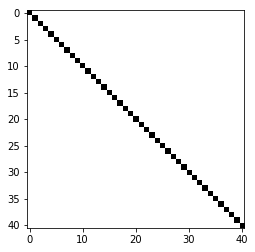

In [33]:
result=confusion_matrix(disease,xcv)
print(result)
plt.imshow(result,cmap='binary')

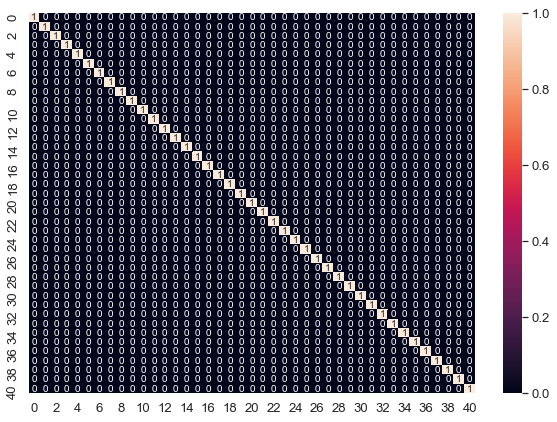

In [34]:
plt.figure(figsize=(10,7))
sn.set(font_scale=1.2)
sn.heatmap(result,annot=True,annot_kws={"size": 10})